In [3]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read in File and Clean Data

In [4]:
# Read CSV
csv_path = Path('../Resources/crypto_data.csv')
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data

# Drop all columns cryptocurrency and data_priceUsd
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])

# Drop missing values
crypto_data = crypto_data.dropna()
crypto_data.head()

,cryptocurrency,data_priceUsd
data_date,,
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
2017-05-14,bitcoin,1789.278913


### Group DataFrame and perform `count` aggregation

In [5]:
crypto_data.groupby('cryptocurrency')

In [3]:
# Group by crypto data by cryptocurrency and perform count
crypto_data_grp = crypto_data.groupby('cryptocurrency').count()
crypto_data_grp

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame without aggregate function

In [3]:
# Group by crypto data by cryptocurrency
crypto_data_grp = crypto_data.groupby('cryptocurrency')
crypto_data_grp

### Group DataFrame by `cryptocurrency` and calculate the average `data_priceUsd`

In [4]:
# Calculate average data_priceUsd for each crypto
crypto_data_mean = crypto_data.groupby('cryptocurrency').mean()
crypto_data_mean

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


### Group by more than one column and calculate count

In [6]:
# Group by more than one column
multi_group = crypto_data.groupby(['cryptocurrency','data_priceUsd']).count()
multi_group

Empty DataFrame
Columns: []
Index: [(bitcoin, 1714.9641980000001), (bitcoin, 1742.722945), (bitcoin, 1743.7235230000001), (bitcoin, 1776.443919), (bitcoin, 1789.2789129999999), (bitcoin, 1802.035054), (bitcoin, 1828.678209), (bitcoin, 1840.501678), (bitcoin, 1932.2849780000001), (bitcoin, 1958.249023), (bitcoin, 1988.961436), (bitcoin, 2041.0432059999998), (bitcoin, 2046.891968), (bitcoin, 2071.957172), (bitcoin, 2096.0676), (bitcoin, 2132.615875), (bitcoin, 2155.227076), (bitcoin, 2192.000968), (bitcoin, 2212.049849), (bitcoin, 2250.859259), (bitcoin, 2288.241462), (bitcoin, 2291.077073), (bitcoin, 2327.194524), (bitcoin, 2346.694194), (bitcoin, 2354.414928), (bitcoin, 2357.075417), (bitcoin, 2372.288414), (bitcoin, 2372.674114), (bitcoin, 2378.79246), (bitcoin, 2407.755441), (bitcoin, 2417.867373), (bitcoin, 2451.2132), (bitcoin, 2453.34868), (bitcoin, 2457.454272), (bitcoin, 2459.347503), (bitcoin, 2466.3220760000004), (bitcoin, 2498.842414), (bitcoin, 2500.43098), (bitcoin, 2505.279935), (bitcoin, 2520.624859), (bitcoin, 2531.377947), (bitcoin, 2539.860407), (bitcoin, 2541.037053), (bitcoin, 2543.7377539999998), (bitcoin, 2545.218537), (bitcoin, 2545.894708), (bitcoin, 2553.676947), (bitcoin, 2566.438671), (bitcoin, 2566.851311), (bitcoin, 2569.003706), (bitcoin, 2570.472055), (bitcoin, 2570.784855), (bitcoin, 2588.95147), (bitcoin, 2590.6412920000002), (bitcoin, 2597.7124719999997), (bitcoin, 2606.473708), (bitcoin, 2612.25551), (bitcoin, 2639.38203), (bitcoin, 2644.42532), (bitcoin, 2671.6309899999997), (bitcoin, 2675.428805), (bitcoin, 2689.351636), (bitcoin, 2697.921409), (bitcoin, 2707.275496), (bitcoin, 2714.153855), (bitcoin, 2725.390532), (bitcoin, 2727.9489550000003), (bitcoin, 2734.367812), (bitcoin, 2743.7321), (bitcoin, 2746.115898), (bitcoin, 2757.4283649999998), (bitcoin, 2758.004095), (bitcoin, 2759.912488), (bitcoin, 2774.08216), (bitcoin, 2782.433486), (bitcoin, 2787.871182), (bitcoin, 2789.302044), (bitcoin, 2793.5616670000004), (bitcoin, 2807.993735), (bitcoin, 2817.290994), (bitcoin, 2819.741341), (bitcoin, 2842.1135329999997), (bitcoin, 2846.735247), (bitcoin, 2894.7766149999998), (bitcoin, 3161.3144899999998), (bitcoin, 3234.1647239999998), (bitcoin, 3239.227422), (bitcoin, 3281.676963), (bitcoin, 3282.4190489999996), (bitcoin, 3312.535286), (bitcoin, 3353.154619), (bitcoin, 3399.898936), (bitcoin, 3401.0455880000004), (bitcoin, 3401.5059450000003), (bitcoin, 3401.88354), (bitcoin, 3403.6714020000004), (bitcoin, 3413.275057), (bitcoin, 3414.1288280000003), (bitcoin, 3423.8151340000004), (bitcoin, 3426.645371), ...]

[3539 rows x 0 columns]

### Compare single column grouping to multicolumn grouping

In [6]:
# Compare one column group with multiple column group
single_group = crypto_data.groupby('cryptocurrency')['data_priceUsd'].count()
single_group

cryptocurrency
bitcoin         722
bitcoin-cash    639
ethereum        722
litecoin        728
ripple          728
Name: data_priceUsd, dtype: int64

### Plot grouped data to generate more than one line on the same chart

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

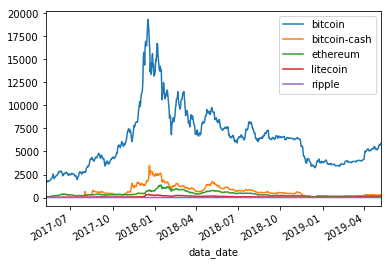

In [7]:
# Plot data_priceUsd for each crypto across time
grouped_cryptos = crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(legend=True)
grouped_cryptos